# pySTAD 

[![PyPI version fury.io](https://badge.fury.io/py/pystad.svg)](https://pypi.python.org/pypi/pystad/)
[![PyPI status](https://img.shields.io/pypi/status/pystad.svg)](https://pypi.python.org/pypi/pystad/)
[![PyPI pyversions](https://img.shields.io/pypi/pyversions/pystad.svg)](https://pypi.python.org/pypi/pystad/)
[![PyPI license](https://img.shields.io/pypi/l/pystad.svg)](https://pypi.python.org/pypi/pystad/)
[![pipeline status](https://gitlab.com/dsi_uhasselt/vda-lab/pystad2/badges/master/pipeline.svg)](https://gitlab.com/dsi_uhasselt/vda-lab/pystad2/-/commits/master)
[![coverage report](https://gitlab.com/dsi_uhasselt/vda-lab/pystad2/badges/master/coverage.svg)](https://gitlab.com/dsi_uhasselt/vda-lab/pystad2/-/commits/master)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/dsi_uhasselt%2Fvda-lab%2Fpystad2/master?urlpath=tree/examples)

This is a python implementation of [STAD](https://ieeexplore.ieee.org/document/9096616/) for exploration and visualisation of high-dimensional
 data. This implementation is based on the [R version](https://github.com/vda-lab/stad).

## Background

[STAD](https://ieeexplore.ieee.org/document/9096616/) is a dimensionality 
reduction algorithm, that generates an abstract representation of 
high-dimensional data by giving each data point a location in a graph which 
preserves the distances in the original high-dimensional space. The STAD graph 
is built upon the Minimum Spanning Tree (MST) to which new edges are added until
the correlation between the graph and the original dataset is maximized. 
Additionally, STAD supports the inclusion of filter functions to analyse data 
from new perspectives, emphasizing traits in data which otherwise would remain 
hidden. 

### Topological Data analysis

Topological data analysis (TDA) aims to describe the geometric structures 
present in data. A dataset is interpreted as a point-cloud, where each point 
is sampled from an underlying geometric object. TDA tries to recover and 
describe the geometry of that object in terms of features that are invariant 
["under continuous deformations, such as stretching, twisting, crumpling and bending, but not tearing or gluing"](https://en.wikipedia.org/wiki/Topology). 
Two geometries that can be deformed into each other without tearing or 
glueing are *homeomorphic* (for instance a donut and coffee mug). Typically, 
TDA describes the *holes* in a geometry, formalised as 
[Betti numbers](https://en.wikipedia.org/wiki/Betti_number).


Like other TDA algorithms, STAD constructs a graph that describes the structure 
of the data. However, the output of STAD should be interpreted as a 
data-visualisation result, rather than a topological description of the data's 
structure. Other TDA algorithms, like 
[mapper](https://github.com/scikit-tda/kepler-mapper), do produce topological 
results. However, they rely on aggregating the data, whereas STAD encodes the 
original data points as vertices in a graph.

### Dimensionality reduction

Compared to dimensionality reduction algorithms like, t-SNE and UMAP, the STAD 
produces a more flexible description of the data. A graph can be drawn using
different layouts and a user can interact with it. In addition, STAD's 
projections retain the global structure of the data. In general, the STAD graph 
tends to underestimate distant data-points in the network structure. On the 
other hand, t-SNE and UMAP emphasize the relation of data-points with their 
closest neighbors over that with distant data-points.

## Installation
Currently, we recommend installing pystad from this repository within a conda 
enviroment with python and nodejs installed:
```bash
pip install git+https://gitlab.com/vda-lab/pystad2#egg=pystad
```
Alternatively, pystad can be compiled from source (see 
`development/Development.md` for instructions)

## How to use pySTAD

### From the commandline
pySTAD has a `__main__` entry-point which can be called using: `python -m stad --help` or `stad --help` from the commandline. These entrypoints take a distance matrix in the form of a `.csv` file and print the resulting network as a JSON string to stdout. Some information of the network is logged to stderr, including the number of added edges and the correlation of the network-distances with the original distances.

### From within python
pySTAD is the most versatile when used within python. Three basic examples are shown below and the example jupyterlab notebooks can be explored on [binder](https://mybinder.org/v2/gl/dsi_uhasselt%2Fvda-lab%2Fpystad2/master?urlpath=tree/examples) without installing pySTAD on your machine.

#### Example 1
Most basic use of pySTAD using the default options.

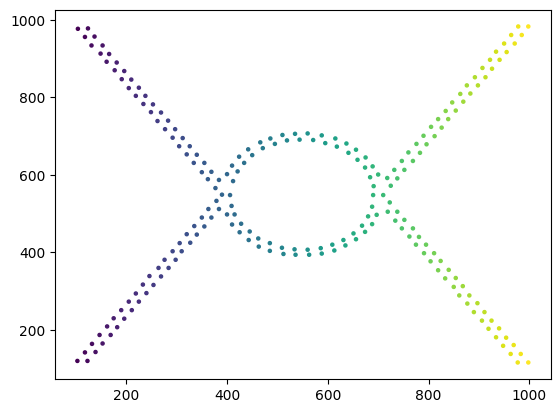

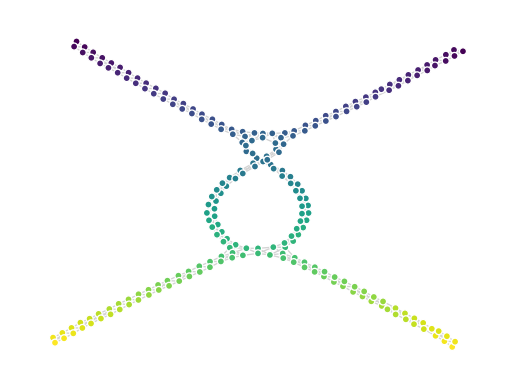

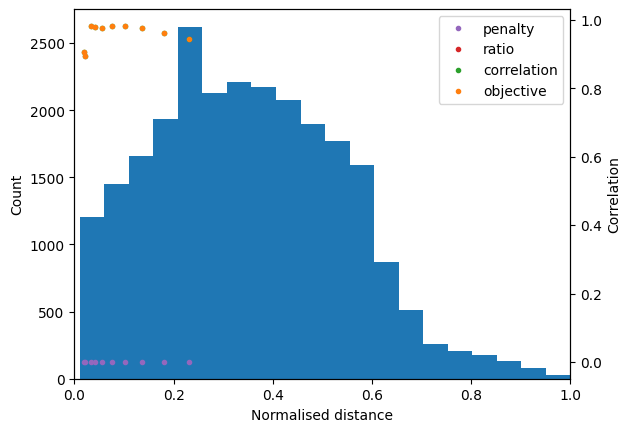

In [1]:
import stad as sd
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load a dataset
data = pd.read_csv('./data/five_circles.csv', header=0)
condensed_distances = pdist(data[['x', 'y']], 'euclidean')

# Show the data in 2D
plt.scatter(data.x, data.y, s=5, c=data.x)
plt.show()

## Compute stad
network, sweep = sd.stad(condensed_distances)
sd.plot.network(network, layout='kk', node_color=data['x'])
plt.show()

# Show the correlation trace
sd.plot.sweep(condensed_distances, sweep)
plt.show()

#### Example 2

Use a lens / filter to highlight some property of the data.

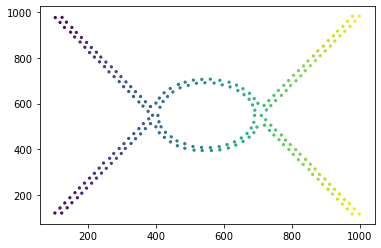

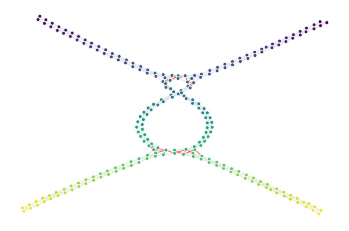

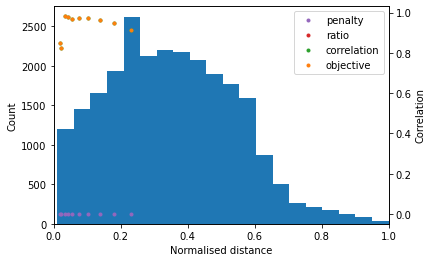

In [2]:
import stad as sd
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load a dataset
data = pd.read_csv('./data/five_circles.csv', header=0)
condensed_distances = pdist(data[['x', 'y']], 'euclidean')

# Show the dataset in 2D
plt.scatter(data.x, data.y, s=5, c=data.x)
plt.show()

# Run stad with a lens
lens = sd.Lens(data['x'].to_numpy(), n_bins=3)
network, sweep = sd.stad(condensed_distances, lens=lens)

# Show which edges cross filter-segment boundaries
edge_color = np.where(lens.adjacent_edges[sweep.network_mask], '#f33', '#ddd')
sd.plot.network(network, layout='kk', edge_color=edge_color, node_color=data['x'])
plt.show()

# Show the correlation trace
sd.plot.sweep(condensed_distances, sweep)
plt.show()

#### Example 3
Explore the resulting network interactively in jupyter-lab.

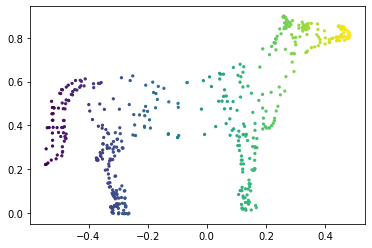

Widget(network=([], []))

In [3]:
import stad as sd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipywidgets as widgets
from scipy.spatial.distance import pdist

# Load data, compute distances, show 2d projection
data = pd.read_csv('./data/horse.csv')
idx = np.random.choice(data.shape[0], 500, replace=False)
data = data.iloc[idx, :]
dist = pdist(data, 'euclidean')
plt.scatter(data.z, data.y, s=5, c=data.z)
plt.show()

## Compute stad without lens
network, sweep = sd.stad(dist, sweep=sd.ThresholdDistance(0.11))
w = sd.Widget()
w

In [4]:
# show() calls only work after the front-end of the widget is instantiated.
# so they have to be in a cell below the cell that outputs the widget.
w.show(network, node_radius=data['x'], node_color=data['z']> 0, node_titles={'color': 'z', 'size': 'x'})

## Compared to the R-implementation

The [R implementation](https://github.com/vda-lab/stad) supports 2-dimensional 
filters (lenses) and uses Simulated Annealing to optimise the output graph. This
implementation currently only supports 1D lenses. In addition, this implementation
uses a logistic sweep on the number of edges in the network by default, but still
supports optimization functions such as simulated annealing. 

This implementation is optimised using Cython and OpenMP, resulting shorter 
computation times compared to the R implementation.

The R implementation uses a MST refinement procedure when using a lens / filter, as
described in the paper. This implementation just uses the MST. The refinement
procedure depends on community detection to remove edges between different groups of
data-points within the same filter segment, which is a process that requires fine-tuning
per dataset. When communities are not detected correctly, edges between distinct groups of
datapoints within a filter segment remain in the network, obscuring the patterns the filter
should expose.


## How to cite

@TODO create DOI for software releases

Please cite our papers when using this software:

APA:

    Alcaide, D., & Aerts, J. (2020). Spanning Trees as Approximation of Data Structures. 
    IEEE Transactions on Visualization and Computer Graphics. 
    https://doi.org/10.1109/TVCG.2020.2995465

Bibtex:

    @article{alcaide2020spanning,
      title={Spanning Trees as Approximation of Data Structures},
      author={Alcaide, Daniel and Aerts, Jan},
      journal={IEEE Transactions on Visualization and Computer Graphics},
      year={2020},
      publisher={IEEE},
      doi = {10.1109/TVCG.2020.2995465},
    }

[![DOI:10.1109/TVCG.2020.2995465](https://zenodo.org/badge/DOI/10.1109/TVCG.2020.2995465.svg)](https://doi.org/10.1109/TVCG.2020.2995465)

and for the STAD-R variant:

APA: 

    Alcaide, D., & Aerts, J. (2021). A visual analytic approach for the identification 
    of ICU patient subpopulations using ICD diagnostic codes. 
    PeerJ Computer Science, 7, e430. 
    https://doi.org/10.7717/peerj-cs.430)

Bibtex:

    @article{alcaide2021visual,
      title={A visual analytic approach for the identification of ICU patient subpopulations using ICD diagnostic codes},
      author={Alcaide, Daniel and Aerts, Jan},
      journal={PeerJ Computer Science},
      volume={7},
      pages={e430},
      year={2021},
      publisher={PeerJ Inc.}
      doi = {10.7717/peerj-cs.430}
    }

[![DOI:10.7717/peerj-cs.430](https://zenodo.org/badge/DOI/10.7717/peerj-cs.430.svg)](https://doi.org/10.7717/peerj-cs.430)